/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

Validation Accuracy: 0.75


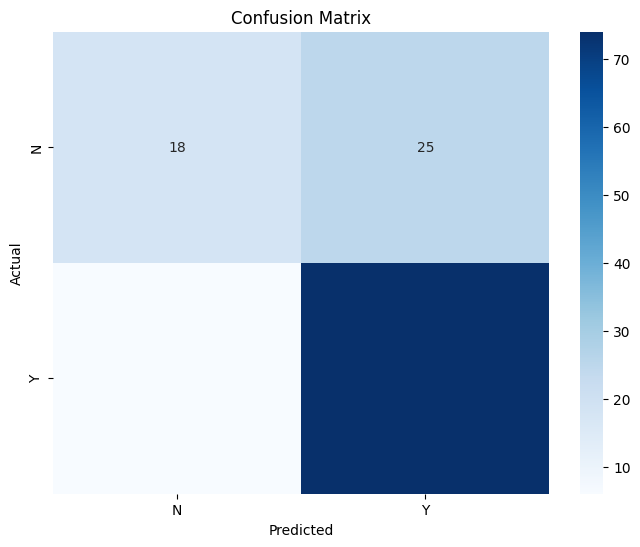

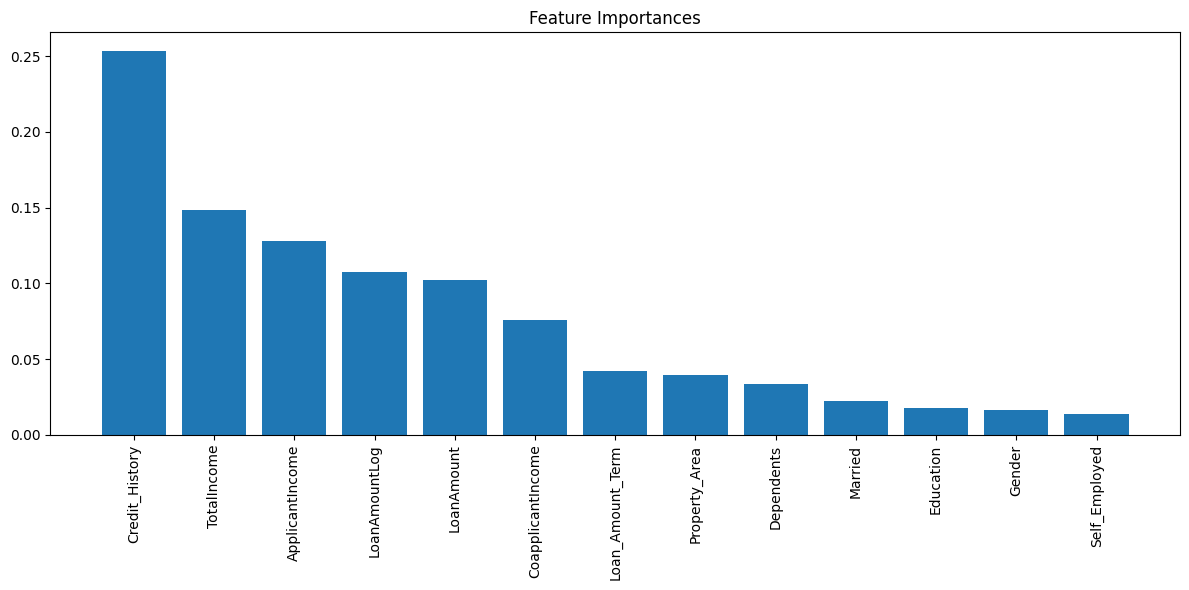

Predictions saved to Loan_Status_Predictions.csv


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets
train_df = pd.read_csv('Training Dataset.csv')
test_df = pd.read_csv('Test Dataset.csv')

# Fill missing values
def fill_missing_values(df):
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df['Married'].fillna(df['Married'].mode()[0], inplace=True)
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Encode categorical variables
def encode_categorical(df):
    le = LabelEncoder()
    categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col])
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# Feature Engineering
def feature_engineering(df):
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['LoanAmountLog'] = df['LoanAmount'].apply(lambda x: np.log(x) if x > 0 else 0)

# Normalize/Scale Data
def normalize_data(df):
    numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome', 'LoanAmountLog']
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Preprocess the datasets
def preprocess_data(df):
    fill_missing_values(df)
    encode_categorical(df)
    feature_engineering(df)
    normalize_data(df)

# Apply preprocessing to train and test datasets
preprocess_data(train_df)
preprocess_data(test_df)

# Separate features and target variable from training dataset
X = train_df.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Prepare test dataset for predictions
X_test = test_df.drop(columns=['Loan_ID'])

# Make predictions on the test dataset
test_df['Loan_Status'] = model.predict(X_test)
test_df['Loan_Status'] = test_df['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the predictions to a new CSV file
test_df[['Loan_ID', 'Loan_Status']].to_csv('Loan_Status_Predictions.csv', index=False)
print('Predictions saved to Loan_Status_Predictions.csv')
